In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
def plot_accs2(progressive_accs_random, progressive_accs_incontext, random_accs, incontext_accs):
    len_datas = len(progressive_accs_random)

    # 示例数据
    x = np.array([i for i in range(len_datas)])  # X轴
    # y1 = [2, 3, 5, 7, 11]  # 折线图数据1
    # y2 = [1, 4, 6, 8, 10]  # 折线图数据2
    # # y3 = [3, 5, 7, 9, 12]  # 折线图数据3
    # bar_data1 = [6, 8, 10, 12, 14]  # 柱状图数据1
    # bar_data2 = [5, 7, 9, 11, 13]  # 柱状图数据2

    # 设置图形
    fig, ax = plt.subplots()

    # 设置柱宽
    bar_width = 0.25

    # 绘制三个柱状图
    ax.bar(x - bar_width/2, random_accs, width=bar_width, color='gray', label='temp=0.6', alpha=0.7)
    ax.bar(x + bar_width/2, incontext_accs, width=bar_width, color='lightblue', label='incontext', alpha=0.7)

    # 绘制折线图
    ax.plot(x, progressive_accs_random, label='0.6 accumulate', linestyle='-', marker='o', color='blue')
    ax.plot(x, progressive_accs_incontext, label='incontext accumulate', linestyle='--', marker='x', color='orange')

    # 添加图例
    ax.legend()

    # 添加标题和坐标轴标签
    ax.set_title("Line and Triple Bar Chart Example")
    ax.set_xlabel("CoT numbers")
    ax.set_ylabel("accuracy")

    # 添加网格
    ax.grid(True, linestyle='--', alpha=0.5)

    # 显示图形
    plt.show()

In [2]:
from utils import load_jsonl
root_path = '/home/wenhao/Time-Constrained-CoT/outputs/12_20/models--Qwen--Qwen2.5-3B-Instruct/math'
top1_similarity_path = root_path + '/test_in-context-corse-to-fine_-1_seed0_t0.0_s0_e-1.jsonl'

incontext_accs, incontext_accumulate_accs = [], []

top1_similarity = list(load_jsonl(top1_similarity_path))
top1_corrects = []
for data in top1_similarity:
    if data['score'][0]:
        top1_corrects.append(data['idx'])
print(top1_corrects)
incontext_accs.append(len(top1_corrects)/len(top1_similarity))
incontext_accumulate_accs.append(len(top1_corrects)/len(top1_similarity))
print(len(top1_corrects))

for i in range(1, 10):
    similarity_path = root_path + '/test_in-context-corse-to-fine_-1_seed0_t0.0_s0_e-1_cot_{}.jsonl'.format(i)
    similarity = list(load_jsonl(similarity_path))
    additional_corrects, this_cot_corrects = [], []

    for data in similarity:
        if data['score'][0]:
            this_cot_corrects.append(data['idx'])
            if data['idx'] not in top1_corrects:
                additional_corrects.append(data['idx'])
                top1_corrects.append(data['idx'])
                

    incontext_accs.append(len(this_cot_corrects)/len(top1_similarity))
    incontext_accumulate_accs.append(len(top1_corrects)/len(top1_similarity))

    print(additional_corrects)
print(len(top1_corrects))

[9, 115, 132, 270, 316, 331, 370, 509, 510, 604, 657, 659, 674, 735, 747, 750, 764, 809, 824, 893, 944, 1066, 1140, 1396, 1529, 1559, 1675, 1762, 1792, 1983, 2052, 2121, 2130, 2133, 2356, 2384, 2469, 2484, 2540, 2590, 2704, 2729, 2898, 2927, 2933, 3047, 3155, 3205, 3267, 3317, 3445, 3490, 3556, 3626, 3645, 3669, 3903, 3904, 3980, 3984, 4008, 4035, 4043, 4134, 4161, 4188, 4270, 4274, 4297, 4362, 4428, 4448, 4482, 4484, 4526, 4585, 4649, 4701, 4715, 4748, 4779, 4809, 4813, 4831, 4884, 4930]
86
[565, 1167, 1225, 2220, 3691, 3867, 3907, 4426]
[515, 1816, 1929, 2597]
[4515, 4941]
[1022, 1144, 1203, 1551]
[2621, 4494]
[776]
[1664]
[]
[]
108


In [3]:
from utils import load_jsonl
root_path = '/home/wenhao/Time-Constrained-CoT/outputs/12_11/models--Qwen--Qwen2.5-3B-Instruct/math'
top1_similarity_path = root_path + '/test_corse-to-fine-structured_-1_seed0_t0.6_s0_e-1.jsonl'

random_accs, random_accumulate_accs = [], []

top1_similarity = list(load_jsonl(top1_similarity_path))
top1_corrects = []
for data in top1_similarity:
    if data['score'][0]:
        top1_corrects.append(data['idx'])
print(top1_corrects)
print(len(top1_corrects))
random_accs.append(len(top1_corrects)/len(top1_similarity))
random_accumulate_accs.append(len(top1_corrects)/len(top1_similarity))

for i in range(1, 10):
    similarity_path = root_path + '/test_corse-to-fine-structured_-1_seed0_t0.6_s0_e-1_cot_{}.jsonl'.format(i)
    similarity = list(load_jsonl(similarity_path))
    additional_corrects, this_cot_corrects = [], []
    for data in similarity:
        if data['score'][0]:
            this_cot_corrects.append(data['idx'])
            if data['idx'] not in top1_corrects:
                additional_corrects.append(data['idx'])
                top1_corrects.append(data['idx'])
                
    random_accs.append(len(this_cot_corrects)/len(top1_similarity))
    random_accumulate_accs.append(len(top1_corrects)/len(top1_similarity))

    print(additional_corrects)
print(len(top1_corrects))

[9, 115, 132, 270, 316, 331, 370, 509, 510, 604, 657, 659, 674, 735, 747, 750, 764, 809, 824, 944, 1140, 1167, 1396, 1559, 1762, 1983, 2121, 2130, 2133, 2220, 2356, 2384, 2469, 2484, 2540, 2590, 2621, 2704, 2729, 2898, 2927, 3047, 3155, 3267, 3317, 3490, 3556, 3626, 3645, 3669, 3691, 3867, 3903, 3904, 3907, 3980, 3984, 4008, 4035, 4161, 4188, 4270, 4274, 4297, 4362, 4426, 4428, 4448, 4482, 4484, 4526, 4701, 4715, 4748, 4779, 4809, 4813, 4831, 4884]
79
[565, 959, 1225, 1529, 1675, 1816, 3205, 3445, 4515, 4649, 4930]
[893, 1022, 1792, 1929, 2052, 2597, 2746, 2933, 4134, 4585, 4941]
[1198, 2254]
[1203, 4494]
[1990]
[776]
[]
[1806, 2257, 4043]
[]
110


In [4]:
from utils import load_jsonl
root_path = '/home/wenhao/Time-Constrained-CoT/outputs/12_20/models--Qwen--Qwen2.5-3B-Instruct/math'
top1_similarity_path = root_path + '/test_in-context-corse-to-fine_-1_seed0_t0.6_s0_e-1.jsonl'

random_incontext_accs, random_incontext_accumulate_accs = [], []

top1_similarity = list(load_jsonl(top1_similarity_path))
top1_corrects = []
for data in top1_similarity:
    if data['score'][0]:
        top1_corrects.append(data['idx'])
print(top1_corrects)
print(len(top1_corrects))
random_incontext_accs.append(len(top1_corrects)/len(top1_similarity))
random_incontext_accumulate_accs.append(len(top1_corrects)/len(top1_similarity))

for i in range(1, 10):
    similarity_path = root_path + '/test_in-context-corse-to-fine_-1_seed0_t0.6_s0_e-1_cot_{}.jsonl'.format(i)
    similarity = list(load_jsonl(similarity_path))
    additional_corrects, this_cot_corrects = [], []
    for data in similarity:
        if data['score'][0]:
            this_cot_corrects.append(data['idx'])
            if data['idx'] not in top1_corrects:
                additional_corrects.append(data['idx'])
                top1_corrects.append(data['idx'])
                
    random_incontext_accs.append(len(this_cot_corrects)/len(top1_similarity))
    random_incontext_accumulate_accs.append(len(top1_corrects)/len(top1_similarity))
    print(additional_corrects)
print(len(top1_corrects))

[9, 115, 132, 270, 331, 370, 509, 510, 515, 565, 604, 657, 659, 674, 735, 747, 750, 764, 809, 824, 1140, 1167, 1198, 1529, 1559, 1675, 1762, 1792, 1816, 1929, 2052, 2121, 2133, 2220, 2257, 2384, 2469, 2484, 2540, 2590, 2621, 2704, 2729, 2927, 2933, 3047, 3155, 3267, 3317, 3445, 3490, 3556, 3626, 3645, 3669, 3691, 3867, 3904, 3907, 3980, 3984, 4008, 4035, 4043, 4134, 4161, 4188, 4270, 4274, 4297, 4362, 4426, 4428, 4448, 4482, 4484, 4526, 4649, 4701, 4715, 4748, 4779, 4809, 4813, 4831, 4930]
86
[316, 959, 1022, 1983, 2130, 2356, 2597, 2746, 2898, 3903]
[893, 944, 1203, 1225, 1396, 2254, 4515, 4585]
[1144, 1551, 4494]
[3205]
[1990]
[1806]
[]
[4941]
[]
111


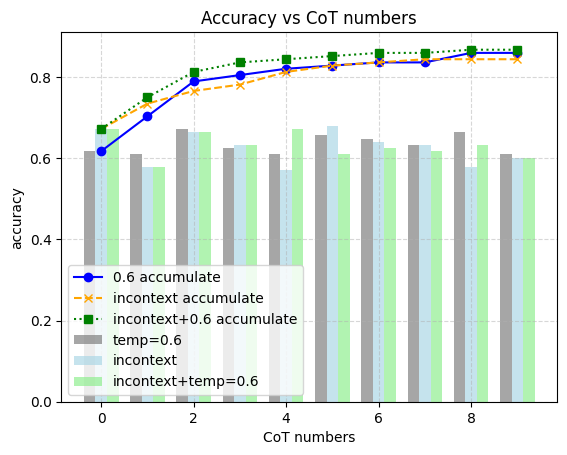

0.671875 0.6796875 0.671875


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
def plot_accs3(progressive_accs_random, progressive_accs_incontext, progressive_accs_random_and_incontext, random_accs, incontext_accs, random_and_incontext_accs):
    len_datas = len(progressive_accs_random)

    # 示例数据
    x = np.array([i for i in range(len_datas)])  # X轴
    # y1 = [2, 3, 5, 7, 11]  # 折线图数据1
    # y2 = [1, 4, 6, 8, 10]  # 折线图数据2
    # # y3 = [3, 5, 7, 9, 12]  # 折线图数据3
    # bar_data1 = [6, 8, 10, 12, 14]  # 柱状图数据1
    # bar_data2 = [5, 7, 9, 11, 13]  # 柱状图数据2

    # 设置图形
    fig, ax = plt.subplots()

    # 设置柱宽
    bar_width = 0.25

    # 绘制三个柱状图
    ax.bar(x - bar_width, random_accs, width=bar_width, color='gray', label='temp=0.6', alpha=0.7)
    ax.bar(x, incontext_accs, width=bar_width, color='lightblue', label='incontext', alpha=0.7)
    ax.bar(x + bar_width, random_and_incontext_accs, width=bar_width, label='incontext+temp=0.6', color='lightgreen', alpha=0.7)

    # 绘制折线图
    ax.plot(x, progressive_accs_random, label='0.6 accumulate', linestyle='-', marker='o', color='blue')
    ax.plot(x, progressive_accs_incontext, label='incontext accumulate', linestyle='--', marker='x', color='orange')
    ax.plot(x, progressive_accs_random_and_incontext, label='incontext+0.6 accumulate', linestyle=':', marker='s', color='green')

    # 添加图例
    ax.legend()

    # 添加标题和坐标轴标签
    ax.set_title("Accuracy vs CoT numbers")
    ax.set_xlabel("CoT numbers")
    ax.set_ylabel("accuracy")

    # 添加网格
    ax.grid(True, linestyle='--', alpha=0.5)

    # 显示图形
    plt.show()


plot_accs3(random_accumulate_accs, incontext_accumulate_accs, random_incontext_accumulate_accs, random_accs, incontext_accs, random_incontext_accs)

print(max(random_accs), max(incontext_accs), max(random_incontext_accs))

In [7]:
np.mean(random_accs)

0.634375

In [9]:
from utils import load_jsonl

cot_results = list(load_jsonl('/home/wenhao/Time-Constrained-CoT/outputs/12_22/models--Qwen--Qwen2.5-3B-Instruct/math/test_merge-cot_-1_seed0_t0.0_merge_cot5_s0_e-1.jsonl'))

num = 0
for datapair in cot_results:
    if not datapair['score'][0]:
        if datapair['gt'] in datapair['prompt']:
            if num == 1:
                print(datapair['gt'])
                print('-----------')
                print(datapair['prompt'])
                print('*'*40)
            num += 1

            

-1
-----------
Solve the task using multiple reasoning paths. Each reasoning path must include: 
1. Coarse-Grained Reasoning: give quick analysis step by step and an answer. Focus on efficiency and simplicity.
2. Fine-Grained Reasoning: give detailed analysis step by step and a refined answer. Focus on accuracy and correctness.
Truncate overly lengthy reasoning. 
You need to judge the most promising solution within the reasoning paths, and put final answer within \boxed{}.

Output format:
**Coarse Reasoning**

**Fine Reasoning**

**Final Answer** within \boxed{}<|im_end|>
<|im_start|>user
Let $x = -1$. Find $$x + x^2 + x^3 + \cdots + x^{2010} + x^{2011}.$$<|im_end|>
<|im_start|>assistant
**Coarse Reasoning**

Given \( x = -1 \), we need to find the sum of the series \( x + x^2 + x^3 + \cdots + x^{2010} + x^{2011} \).

Substituting \( x = -1 \):
\[ -1 + (-1)^2 + (-1)^3 + \cdots + (-1)^{2010} + (-1)^{2011} \]

Notice that:
- \( (-1)^{2k} = 1 \) for even \( k \)
- \( (-1)^{2k+1} = -1 \) f

In [4]:
print(num)

27
